## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.stats import bartlett
from statsmodels.stats import diagnostic as diag
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis

In this we will check the characteristics of the sample, its distribution, missing values, outliers and will try to build hypothetical analysis for the same

In [4]:
#Here we can see that the sample do not contain any null values amd the data type of column "Hours" is float
#data type of column "Scores" int.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
len(df)

25

In [6]:
#Here we can get most of the statisitical inference of the data
#From this we can see that the column "Hours" has a standard dev of 2.52 around mean 5.01 and for column "Score", it has a 
#standard dev of 25.2 around mean 51.48
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the quartiles we can also analyse that there is no any suddent increase in the values from min to 25% quantile and 75% to max which suggests the absense of the outliers. But need to confirm this

***Scatter Plot for Hours vs Percentage Score of students***

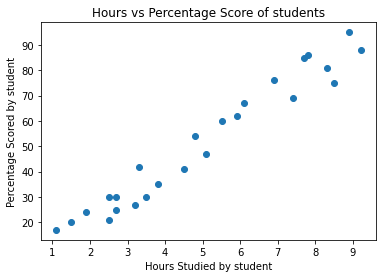

In [7]:
#From rge plot, we can infer that there is a positive linear relationship between no. of hours studies and the percentage score
#Also the outlier are absent in the dataset as we do not see any data point giving the extreme different values
plt.plot(df['Hours'],df['Scores'],marker='o', ls='')
plt.xlabel('Hours Studied by student')  
plt.ylabel('Percentage Scored by student')
plt.title('Hours vs Percentage Score of students')
plt.show()

***KDE Plot for checking the data distribution of each column***

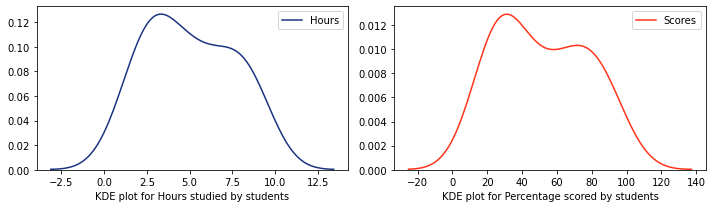

In [8]:
fig, ax =plt.subplots(1,2,figsize=(10,3))
ax[0].set_xlabel('KDE plot for Hours studied by students')
ax[1].set_xlabel('KDE plot for Percentage scored by students')
sns.kdeplot(df['Hours'], ax=ax[0],color=(0.1, 0.2, 0.5))  
sns.kdeplot(df['Scores'], ax=ax[1],color=(1,0.2,0.1))
fig.tight_layout()

From graphically we have seen that the sample is equally distributed. However we graphical inference sometimes leads to the wrong observations. Hence doing quantitative analysis. As for applying model our input variable is Hours studied by the student, we will focus on the same.

### Hypothetical Testing

***Shapiro-Wilk Test for Normal Distribution***

***Null Hypothesis -*** The sample is not significantly deviated from normal distribution

***Alternate Hypothesis -*** The sample is significantly deviated from normal distribution

In [9]:
stats.shapiro(df['Hours'])

ShapiroResult(statistic=0.9401376247406006, pvalue=0.1491180658340454)

In [10]:
st,p=stats.shapiro(df['Hours'])
if p<0.05:
    print('The sample is not normally distributed')
else:
    print('The sample is normally distributed')

The sample is normally distributed


***From above analysis we get test statistic as 0.940 and the p value of 0.149 for the sample of "No. of Hours studied by the student". As we get pvalue < 0.05 we can say that our sample is not significantly deviated from normal distribution.***

***Hypothetical testing to find the relationship between no. of hours studied by the student and the Percentage scored by the student***

***Null Hypothesis -*** There is no relationship between the no. of hours studied and the percentage scored by the student i.e., the correlation between them is 0

***Alternate Hypothesis -*** The no. of hours studied by the student is related to the percentage scored by the student i.e., the correlation between them is not 0

In [11]:
corr,p=pearsonr(df['Hours'],df['Scores'])
if p<0.05:
    print("The correlation coefficient is:",corr,
         "\nThe p value of the correlation coefficient is:",p,
         "\nThe no. of study hours and the percentage scored by the student are correlated")
else:
    print("The correlation coefficient is:",corr,
         "\nThe p value of the correlation coefficient is:",p,
         "\nThe no. of study hours and the percentage scored by the student are not correlated")

The correlation coefficient is: 0.9761906560220884 
The p value of the correlation coefficient is: 9.132624467460325e-17 
The no. of study hours and the percentage scored by the student are correlated


***The no. of study hours is significantly correlated to the percentage scored by the student in the positive direction.The p value of correlation coefficient is < 0.05 (i.e.,9.132624467460325e-17) and correlation coefficient is 0.976***

Here there is no predictive ability using tradition hypothetical testing for the given dataset except saying that the two feature are positively correlated Hence performing linear regression using sk-learn

# Linear Regression

***The assumptions in order to apply linear regression are:***

1. The data should be linearly correlated with the output - satisfied
2. No endogeneity (correlation between independent variables and errors caused due to ommited variable bias) - satisfied as we ony have one feature, so do not have effect for the same
3. Normality, zero mean and homoscadasity (error terms should have zero mean and equal variance one with the other i.e., no pattern) - need to be checked using error terms
4. No autocorrelation (errors are assumed to be uncorrelated) - satisified as there is only one independet variable
5. No Multicollinearity (No two or more variables are highly correlated) - satisfied as there is only one independent variable

### Preparing the data

In [12]:
inp=df['Hours']
op=df['Scores']

In [13]:
x=inp.values.reshape(-1,1)

In [14]:
y=op.copy()

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,op,test_size=0.3,random_state=10)

### Taking the algorithm

In [16]:
reg_model = LinearRegression()  
reg_model.fit(x,y)

LinearRegression()

In [17]:
reg_model.coef_

array([9.77580339])

In [18]:
reg_model.intercept_

2.483673405373196

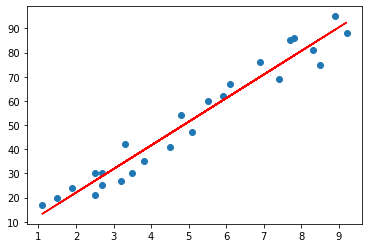

In [19]:
# Plotting the regression line
reg_line = reg_model.coef_*x+reg_model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, reg_line,color='red');
plt.show()

### Making Prediction

In [20]:
#Testing data in hours
xtest

array([[1.5],
       [5.1],
       [3.3],
       [3.2],
       [4.5],
       [7.4],
       [1.1],
       [5.5]])

In [21]:
#Predicting the scores
y_pred = reg_model.predict(xtest)

In [22]:
y_pred

array([17.14737849, 52.3402707 , 34.74382459, 33.76624426, 46.47478866,
       74.8246185 , 13.23705714, 56.25059205])

In [23]:
# Comparing Actual vs Predicted
df_pred = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})  
df_pred

,Actual,Predicted
5,20,17.147378
1,47,52.340271
13,42,34.743825
2,27,33.766244
12,41,46.474789
19,69,74.824618
14,17,13.237057
7,60,56.250592


### Checking for the assumptions

#### Normal distribution of the residuals

In [24]:
residuals= ytest.values-y_pred

In [25]:
residuals

array([ 2.85262151, -5.3402707 ,  7.25617541, -6.76624426, -5.47478866,
       -5.8246185 ,  3.76294286,  3.74940795])

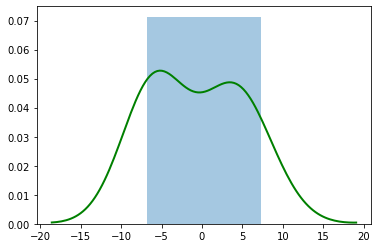

In [26]:
sns.distplot(residuals,kde_kws={"color": "g", "lw": 2})

In [27]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.8287175297737122, pvalue=0.05757066234946251)

In [28]:
st,p=stats.shapiro(residuals)
if p<0.05:
    print('The sample is not normally distributed')
else:
    print('The sample is normally distributed')

The sample is normally distributed


#### Zero mean, homoscedascity of the errors

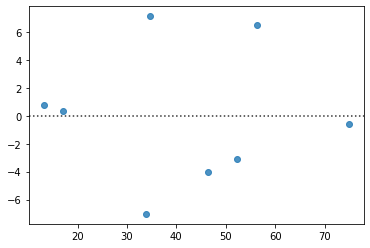

In [29]:
sns.residplot(y_pred,residuals)

From the residual plot we cannot see any cone shaped pattern around the 0 axis, the residuals are distributed randomly around 0 reference line. Hence in order to confirm the same, applying hypothetical test

#### Goldfeld Quandt Test 

***Null Hypothesis -*** Error terms are homoscedastic

***Alternate Hypothesis -*** Error terms are heteroscedastic

In [30]:
f_st,p,alt = sms.het_goldfeldquandt(residuals, xtest)

In [31]:
f_st,p

(0.5913135387730253, 0.6616832534479682)

In [32]:
if p < 0.05:
    print("The error terms are heteroscedastic")
else:
    print("The error terms are homoscedastic")

The error terms are homoscedastic


***The F statistic for Goldfeld-Quandt test is 0.59 and the p value for the same is 0.66, as the p > 0.05, we can reject the null hypothesis that the error terms are heteroscedastic and accept the alternate terms that error terms are homoscedastic***

#### Bartlett's Test

***Null Hypothesis -*** All the inputs are from population with equal variance i.e., show homoscedastic effect

***Alternate Hypothesis -*** At least 2 variances are different i.e., show heteroscedastic effect

In [33]:
bart_xtest=xtest.reshape(-1)

In [34]:
st,p = bartlett(bart_xtest,residuals)
st,p

(5.529312829565914, 0.018700448385531455)

In [35]:
if p < 0.05:
    print("The error terms are heteroscedastic")
else:
    print("The error terms are homoscedastic")

The error terms are heteroscedastic


***The statistic value of bartlett test is 5.529 and the p value is 0.018 < 0.05. As p < 0.05, it rejects our null hypothesis that the error terms are homoscedastic which is not good for our regression***

#### Mean of the residuals

In [36]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.7230967989837087


The mean of the residuals should be equal to or near to zero, here we get the mean of residuals as -0.723, non zero mean means the line is not good fit for the data however the intercept solves this problem by forcing the residual mean to equal zero

#### No Autocorrelation

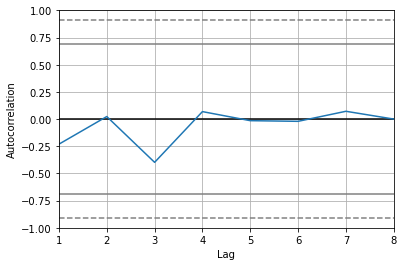

In [37]:
residual_df = pd.DataFrame(residuals)
autocorrelation_plot(residual_df)
plt.show()

In the above autocorrelation plot we did not find any pattern over the time hence we can say that there is no autocorrelation between the errors. However we can also plot the following graph to confirm this

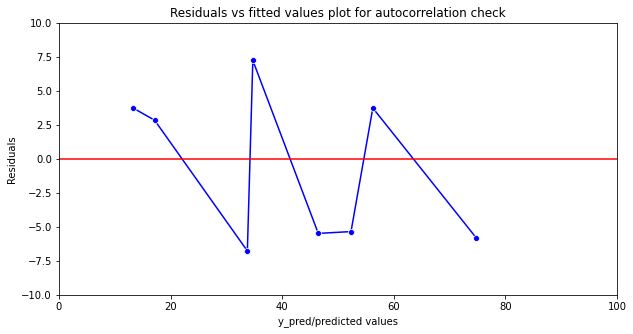

In [38]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,100)
p = sns.lineplot([0,100],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

From the above graph, we can say that there is no pattern found within the residuals within time hence there is no auto-correlation which satisfies our assumption that the residuals are not dependent on their previous values

Applying statistical hypothesis for the autocorrelation

#### Ljungbox test

***Null Hypothesis -*** The model does not show significant lack of fit which means that the auto-correlation of the residuals are very small or equal to zero

***Alternate Hypothesis -*** The model shows the lack of fit, means the auto-correlation exists within residuals and the model is not good enough.

In [39]:
min(diag.acorr_ljungbox(residuals,lags=7)[1])

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.36934069833794103

***Here p values > 0.05 and thus we accept the null hypothesos that there is no any autocorrelation within the residuals***

We can also plot the auto-correlation and the partial auto-correlation plots for the residuals

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


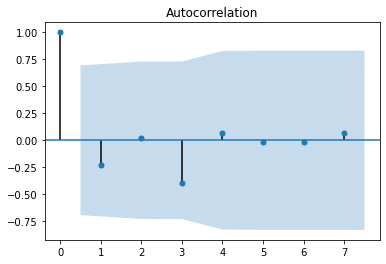

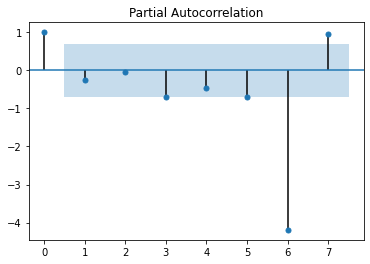

In [40]:
plot_acf(residuals, lags=7)
plot_pacf(residuals, lags=7)
fig.tight_layout()

Thus from the above auto-correlation and the partial auto-correlation plot we did not find any specific pattern and can say that the residuals are not correlated or affected by the previous values

Further we can also perform durbin_watson test to provide the support for our analysis

#### Durbin_Watson test for auto-correlation

For durbin_watson test if the statistic value of durbin watson test is from 0 to 2 it shows positive auto-correlatin and 2 to four negative auto-correlation. The thumb rue is if the statistic value is between 1.5 to 2.5 we can say that there is no auto-correlation

In [41]:
st=sms.stattools.durbin_watson(residuals, axis=0)

In [42]:
if st >= 1.5 and st <= 2.5:
    print("Durbin_watson statistic value is: ",st,'\nThere is no autocorrelation between the errors')
elif st >=0 and st <=1.5:
    print("Durbin_watson statistic value is: ",st,'\nThere is positive auto-correlation between the errors')
elif st >=2.5 and st <=4:
    print("Durbin_watson statistic value is: ",st,'\nThere is negative auto-correlation between the errors')

Durbin_watson statistic value is:  2.2716425786403907 
There is no autocorrelation between the errors


#### No multicollinearity

Multicollinearity refers the extent to which the independent variables are correlated. multicollinearity affects the predictions and the p values but it does not affect the coefficient and the p-values, but does not affect the prediction, precision of prediction and the goodness-of-fit. If primary goal is to make predictions only and there is no need to understand the role of each independent variable, we don't need to reduce severe multicollinearity. Using the heatmap we can analyse the multicollinearity effect in the data set.

plt.figure(figsize=(20,20))

p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)

but as our df consists of only one input variables, there is no need to analyse for multicollinearity

# Evaluating the model

In [43]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(ytest, y_pred))
print('Mean Square Error:', 
      metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Square Error:',
      math.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R2 Score:',
      metrics.r2_score(ytest,y_pred))

Mean Absolute Error: 5.1283837298662185
Mean Square Error: 28.40092174220563
Root Mean Square Error: 5.329251518009412
R2 Score: 0.90500867564666


In [45]:
#We can also predict using our data
hours = 9.25
own_pred = reg_model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.90985477015731


***Thus if a student studied for 9.25 hours per day, he could score 92.90% in the examination***